# End to End Medial Diagnostic Use Case 

Steps of the project:
0. Create a virtual environment with python=3.8.13
1. Import and view the data 
2. Check the data for Sanity
3. Perform EDA on data set 
4. Preprocess the data for modelling
5. Fit and Evlaute various Models
6. Optimize the chosen model
7. Interpret the optimized model
8. Pickle and save the model as a pipeline
9. Deploy the model pipeline in streamlit
10. Scale model to cloud using git and streamlit sharing
    

In [57]:
!pip install imbalanced-learn

In [58]:
!pip install xgboost

In [59]:
!pip install shap

In [60]:
# Load all the librarires
# for data manipulation and visualization 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# preprocessing modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# modelling modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# modules for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve

#for model interpretation
import shap

# deployment module
#import streamlit as st

print("All Libraries are imported")


All Libraries are imported


### 1. Import and view the data 

In [61]:
data=pd.read_csv('data.csv')

In [62]:
data.head()

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,Yes
1,1,1,85,66,29,0,26.6,0.351,31,No
2,2,8,183,64,0,0,23.3,0.672,32,Yes
3,3,1,89,66,23,94,28.1,0.167,21,No
4,4,0,137,40,35,168,43.1,2.288,33,Yes


In [63]:
data.shape


(768, 10)

###  Check the data for Sanity

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
 9   Outcome                   768 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 60.1+ KB


In [65]:
data.isnull().sum()

Unnamed: 0                  0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [66]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,768.0,383.500000,221.846794,0.000,191.75000,383.5000,575.25000,767.00
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [67]:
# check for any other non real characters
data[~data.applymap(np.isreal).any(1)]

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Observations**
1. Data set has 768 rows and 10 columns( 1 redundant)
2. Dataset has no direct nulls but has nulls imputed as 0
3. Dataset has only 1 categorical variable the Outcome


In [68]:
data.columns

Index(['Unnamed: 0', 'Pregnancies', 'Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [69]:
# drop the redundant column
data=data.drop('Unnamed: 0', axis=1)

In [70]:
# treat the nulls
zerofiller=lambda x: x.replace(0, x.median())
cols=data.columns[1:6]
data[cols]=data[cols].apply(zerofiller, axis=0)

In [71]:
#encode categoricals
df=data.copy()
d={'Yes':1, 'No':0}
df['Outcome']=df['Outcome'].map(d)

In [72]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0


### Perform EDA on data set 
1. UNIVARIATES- NUMERICALS
2. UNIVARIATES-CATEGORICALS
3. BIVARIATES-NUMERICAL vs CATEGORICAL
4. BIVARIATES- NUMERICALS VS NUMERICLAS
5. MULTIVARIATE CHARTS 
6. Correlations and Heatmaps 

##### 1. UNIVARIATES

In [73]:
def histograms(data):
    print('Univariate Histogram')
    data.hist()
    plt.tight_layout()
    plt.show()
    

Univariate Histogram


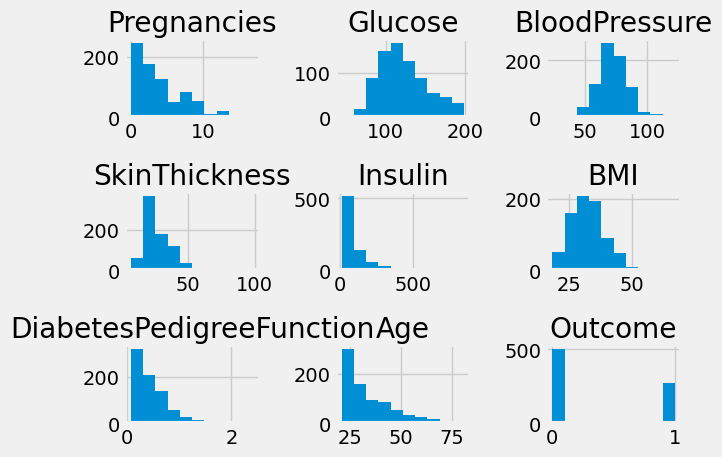

In [74]:
histograms(df)

In [75]:
def barchart(data, feature):
    print("Barchart of Categoricals")
    ax=sns.countplot(data=data, x=feature, color='green')
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate("{:.2g}%".format(100.*y/len(data)), (x.mean(),y), ha='center' , va='bottom')                                  
    plt.show()

Barchart of Categoricals


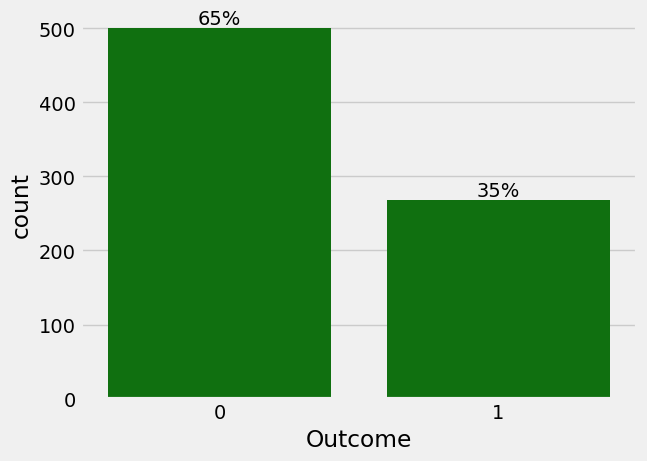

In [76]:
barchart(data=df, feature='Outcome')

**Observations**
Outcome variable is highly imbalanced. We need to solve for data imbalance 

In [77]:
def boxpolot_histplot(data, feature, figsize=(12,7), bins=None):
    print("Univariates of ", feature)
    fig, (ax_box, ax_hist)=plt.subplots(
    nrows=2,
    sharex=True,
    gridspec_kw={'height_ratios':(0.25,0.75)},
    figsize=figsize)
    
    sns.boxplot(data=data,x=feature, showmeans=True, ax=ax_box, color='violet')
    
    sns.histplot(data=data, x=feature, bins=bins, ax=ax_hist, pallete='winter') if bins else\
         sns.histplot(data=data,x=feature, ax=ax_hist)
    plt.axvline(data[feature].mean(),linestyle='--', color='green')
    plt.axvline(data[feature].median(), linestyle='-', color='black')
    plt.show()
    
    
    

Univariates of  Pregnancies


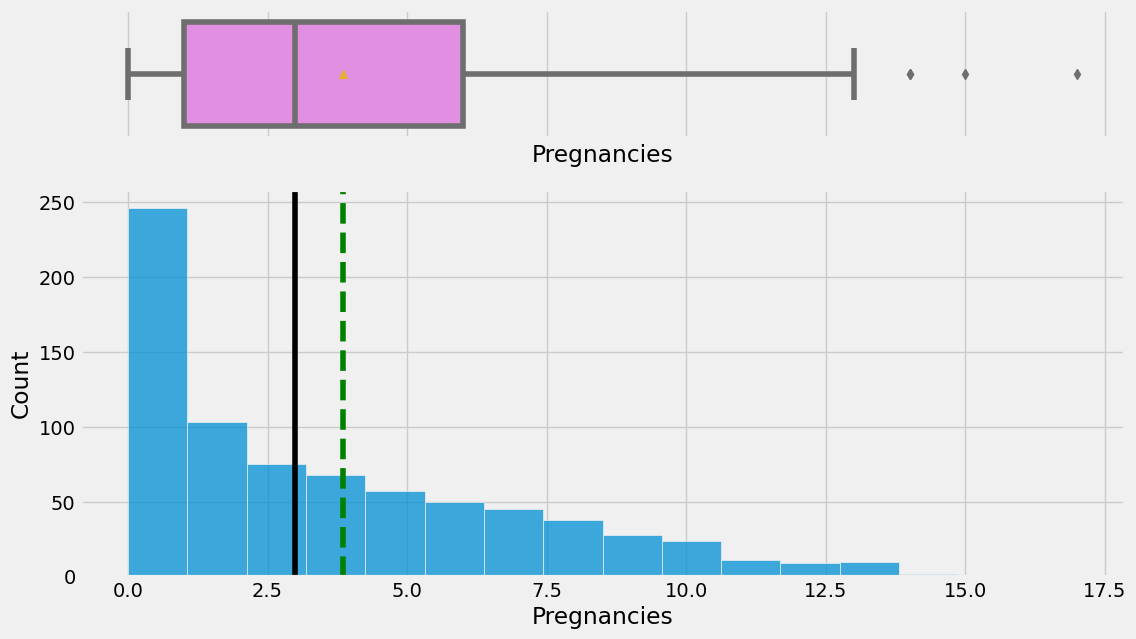

Univariates of  Glucose


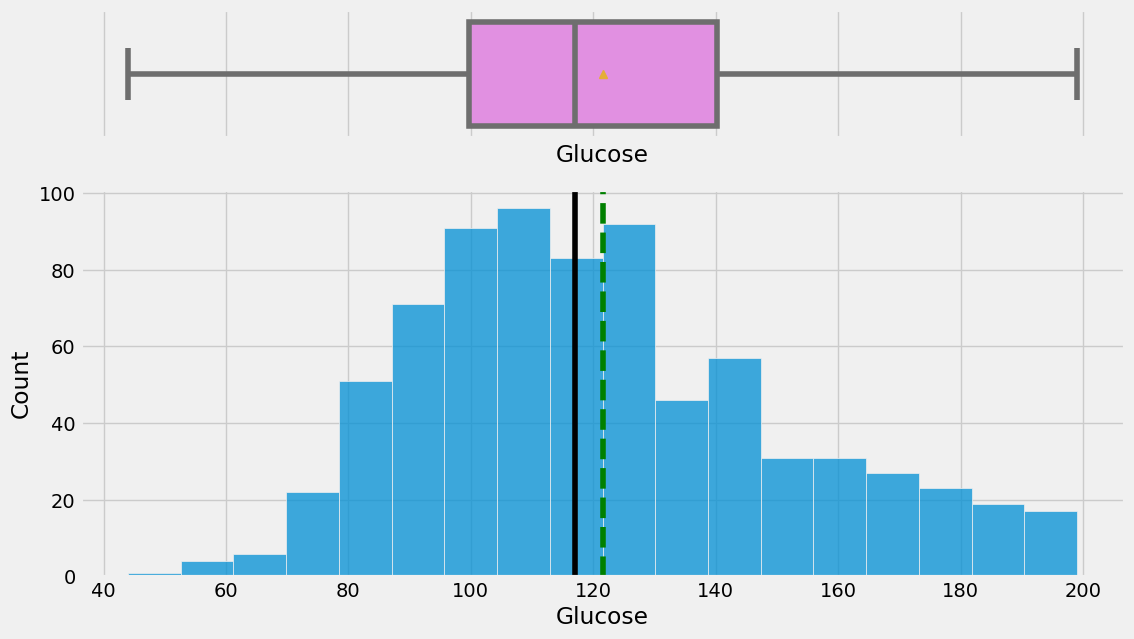

Univariates of  BloodPressure


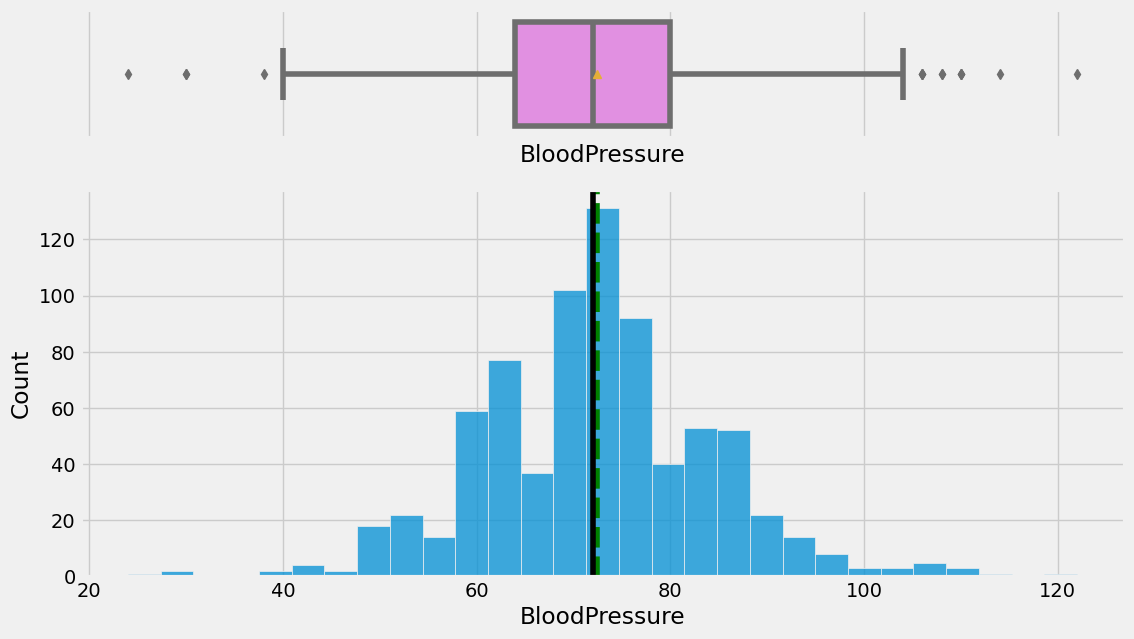

Univariates of  SkinThickness


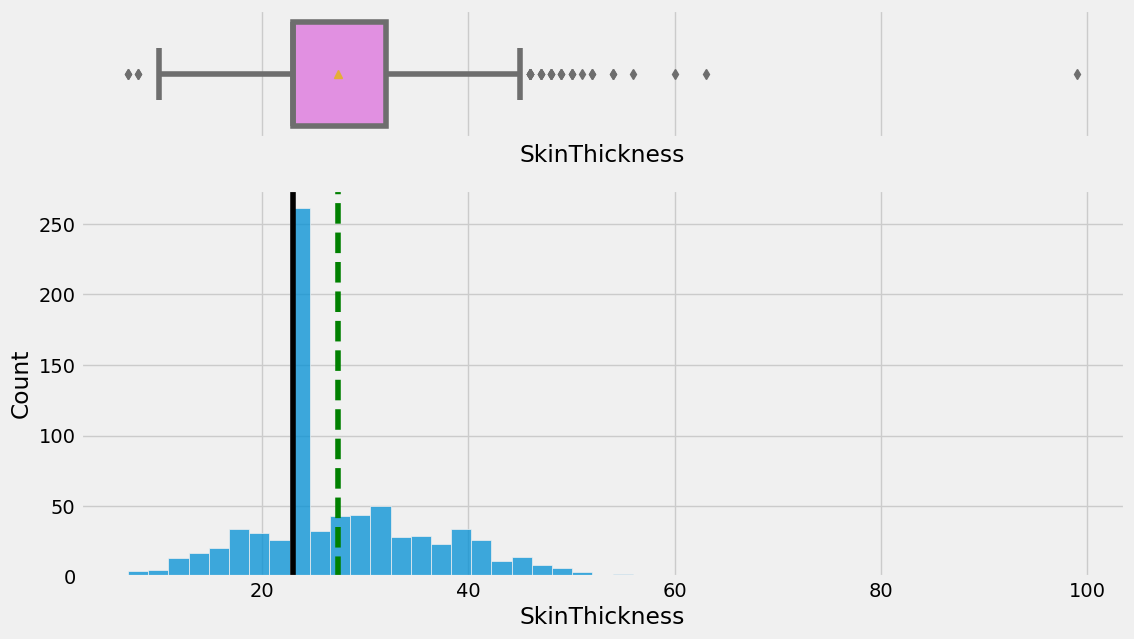

Univariates of  Insulin


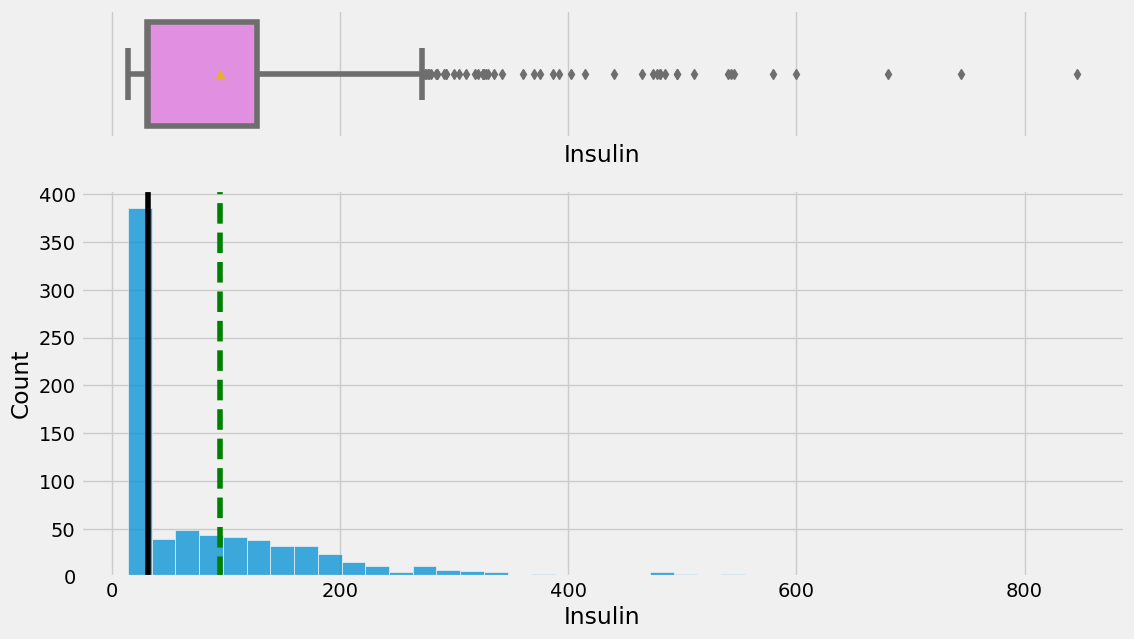

Univariates of  BMI


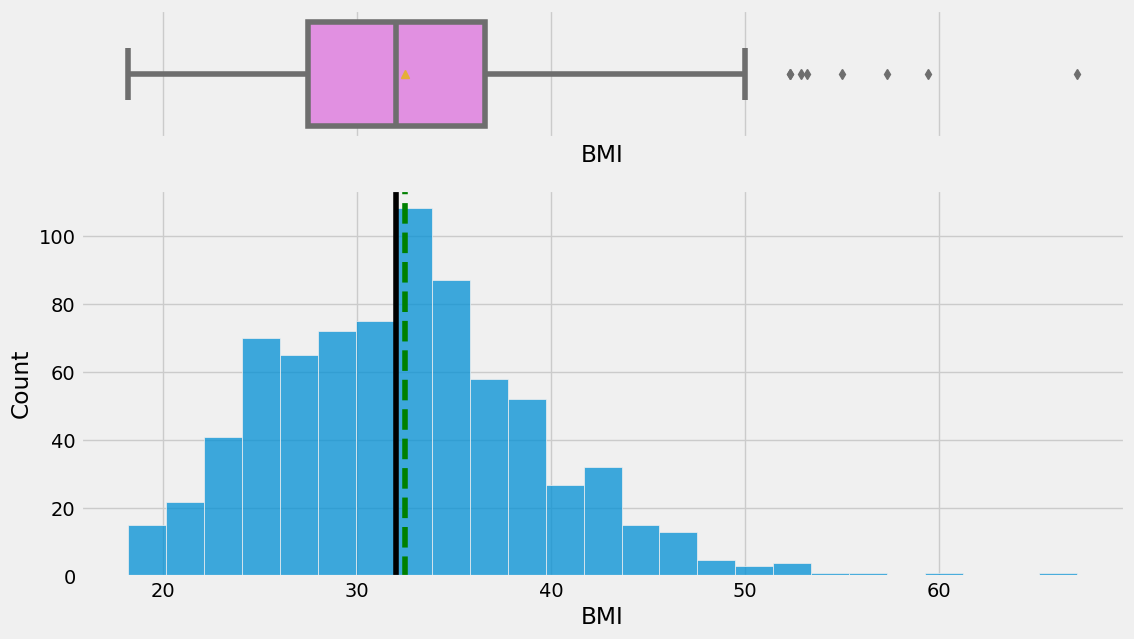

Univariates of  DiabetesPedigreeFunction


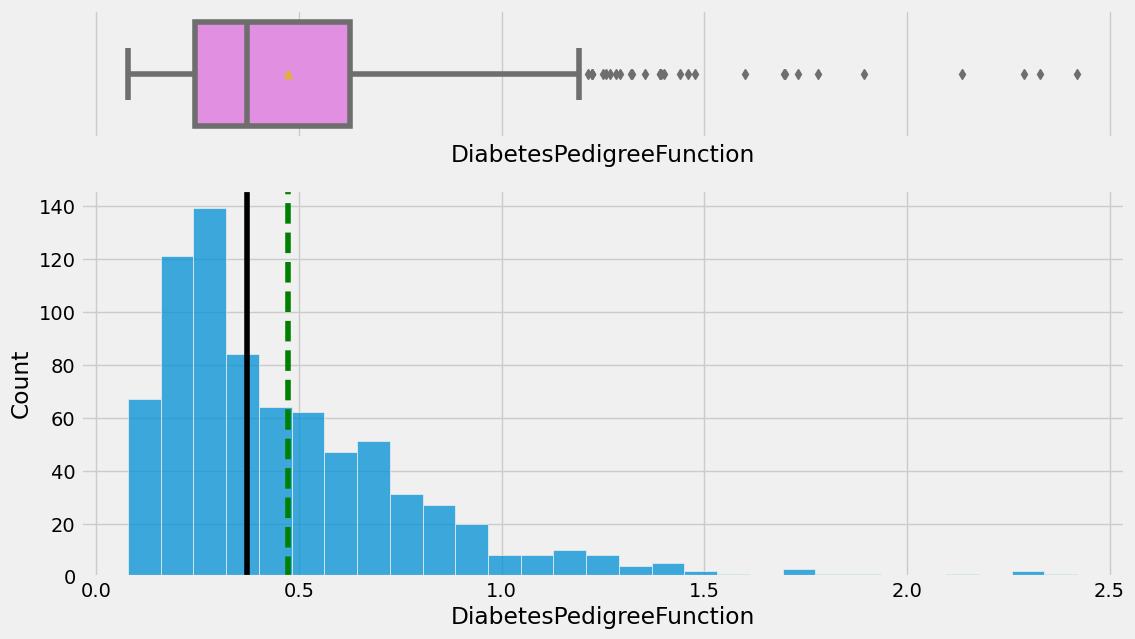

Univariates of  Age


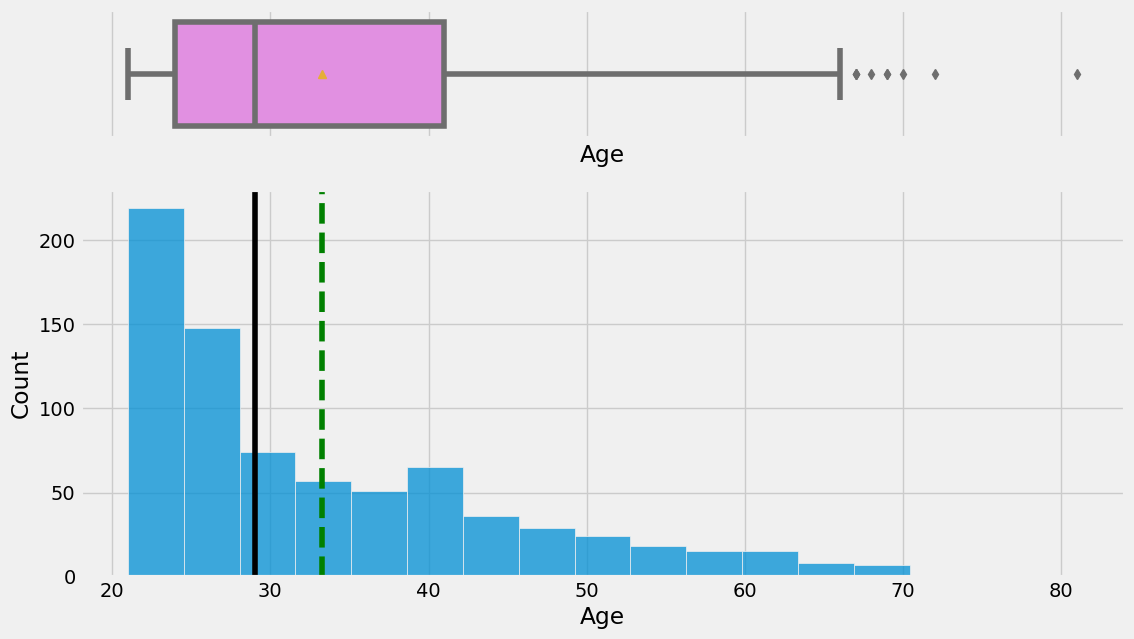

Univariates of  Outcome


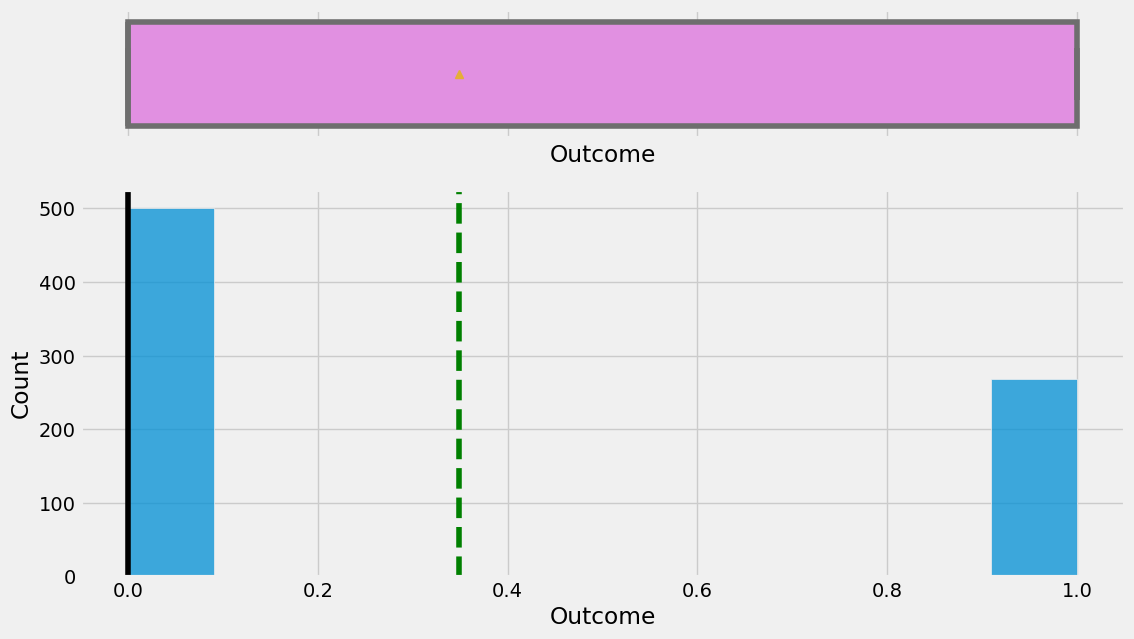

In [78]:
for col in df.select_dtypes(exclude='O').columns:
    boxpolot_histplot(data=df, feature=col)

**Observations**
1. Pregnancies has some suspect outliers which have to be looked upon
2. Skin thickness also has some suspect outliers which need to be taken care of 
3. Insulin is highly right skewed aand may need to be engineered
4. Diabetes pedigree function is also highly right skewed and needs to be engineered.
5. Outcome is highly imbalanced and may need balancing.

##### BIVARIATES-NUMERICAL vs CATEGORICAL

In [79]:
def catnums(data, feature1, feature2):
    print("Bivariate Barchart between {0} and {1}".format(feature1, feature2))
    data.groupby(feature1)[feature2].mean().plot(kind='bar',color='orange')
    plt.show()

Bivariate Barchart between Outcome and Pregnancies


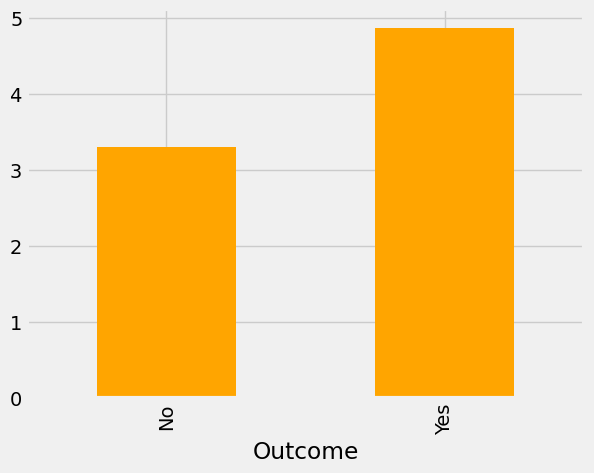

Bivariate Barchart between Outcome and Glucose


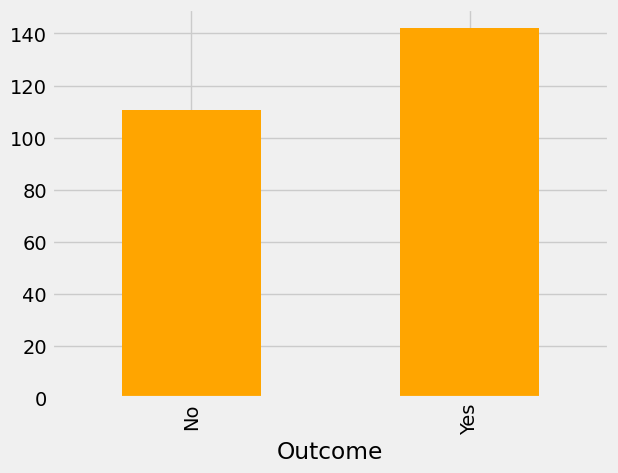

Bivariate Barchart between Outcome and BloodPressure


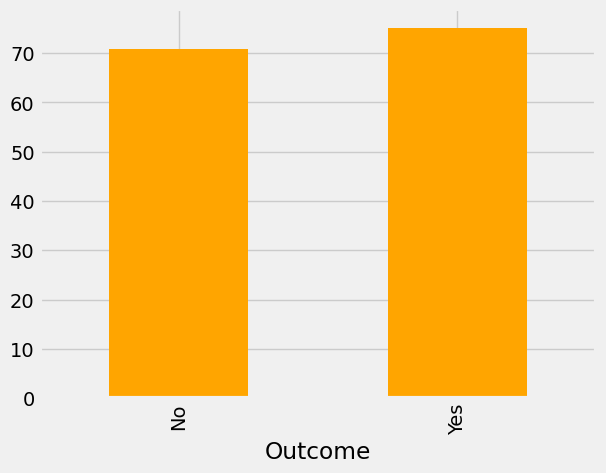

Bivariate Barchart between Outcome and SkinThickness


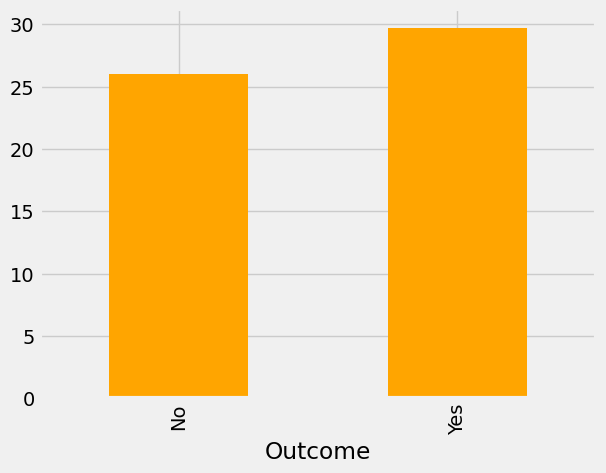

Bivariate Barchart between Outcome and Insulin


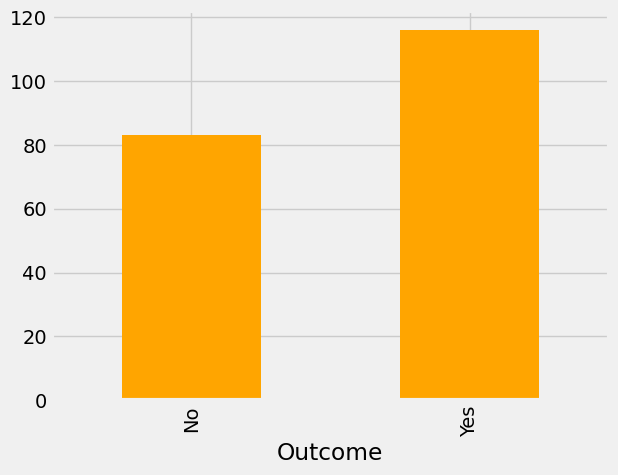

Bivariate Barchart between Outcome and BMI


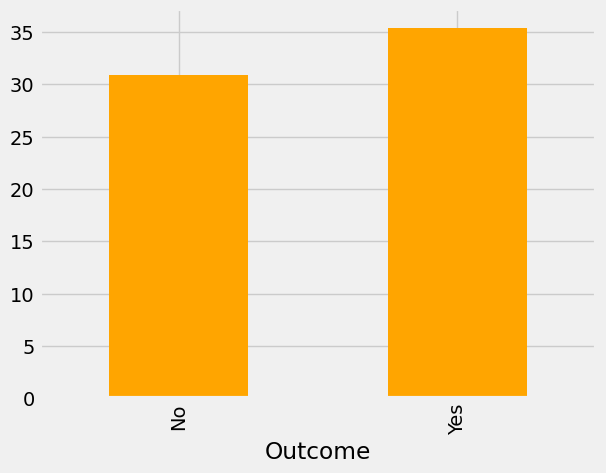

Bivariate Barchart between Outcome and DiabetesPedigreeFunction


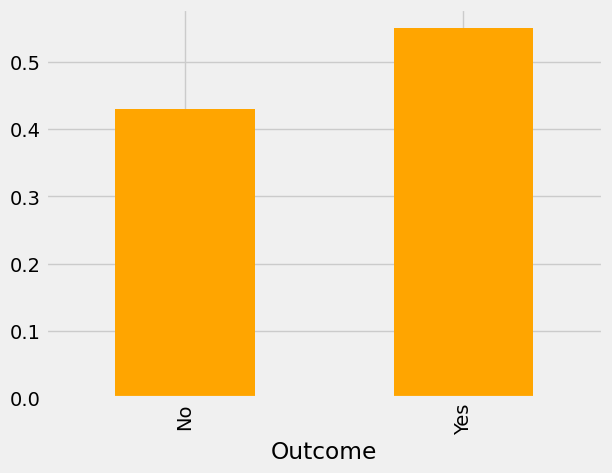

Bivariate Barchart between Outcome and Age


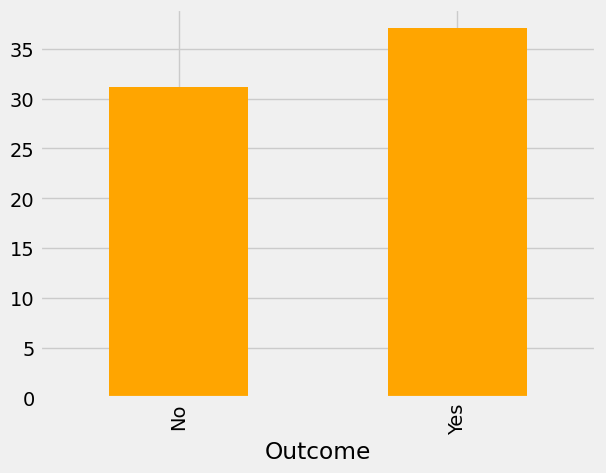

In [80]:
for col in data.select_dtypes(exclude='O').columns:
    catnums(data=data, feature1='Outcome', feature2=col)

**Observations**
Woman with higher pregnancies, higher diabetes predigree functions and Insulin use are more likely to be diabetic

##### BIVARIATES-NUMERICAL vs NUMERICAL

In [81]:
def lineplot_scatterplot(data, feature1, feature2):
    print("Bivariates between {0} and {1}".format(feature1, feature2))
    plt.figure(figsize=(16,7))
    plt.subplot(1,2,1)
    sns.lineplot(data=data, x=feature1, y=feature2, color='green')
    plt.subplot(1,2,2)
    sns.scatterplot(data=data, x=feature1, y=feature2, color='blue')
    plt.show()

Bivariates between Pregnancies and Pregnancies


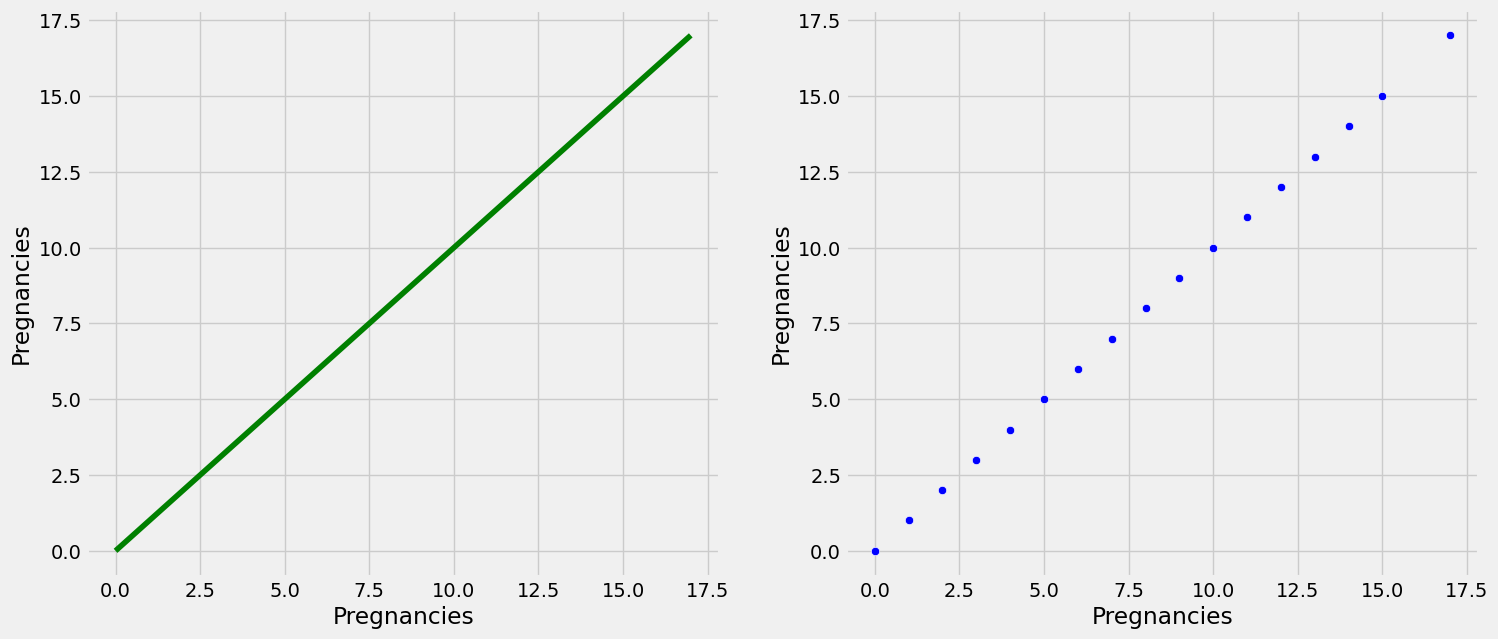

Bivariates between Pregnancies and Glucose


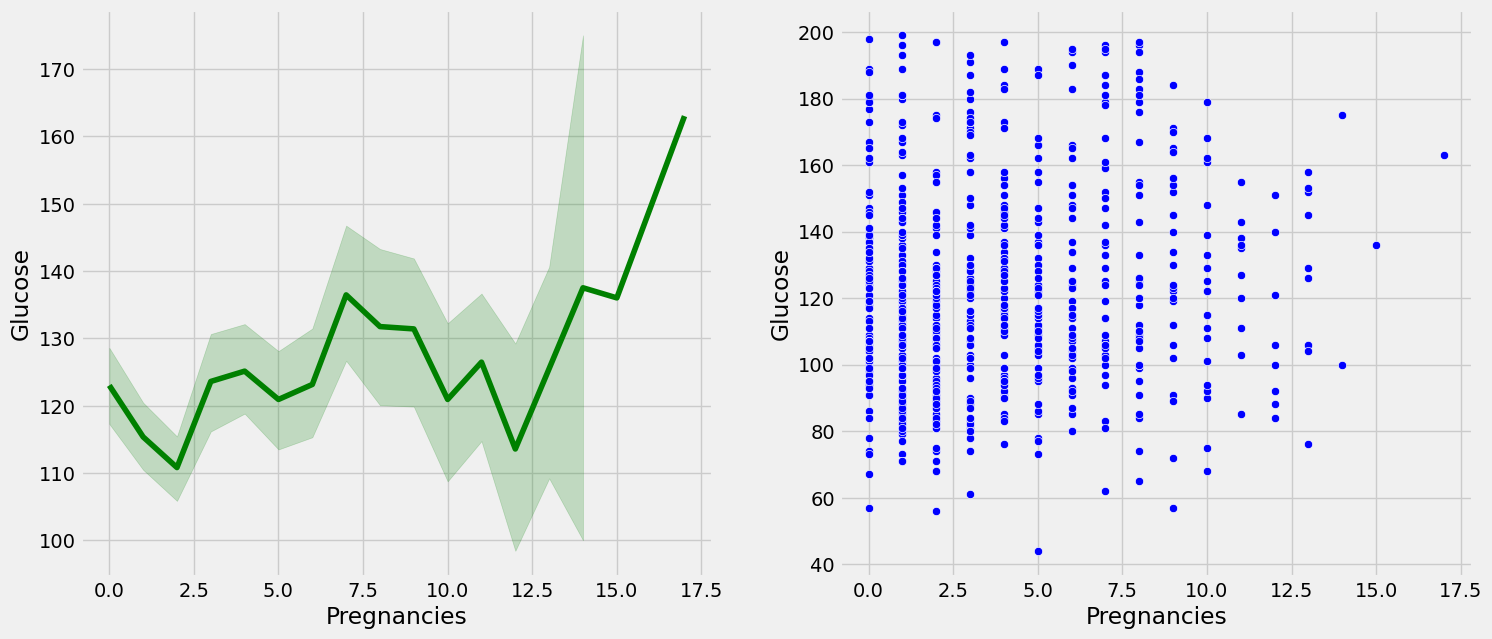

Bivariates between Pregnancies and BloodPressure


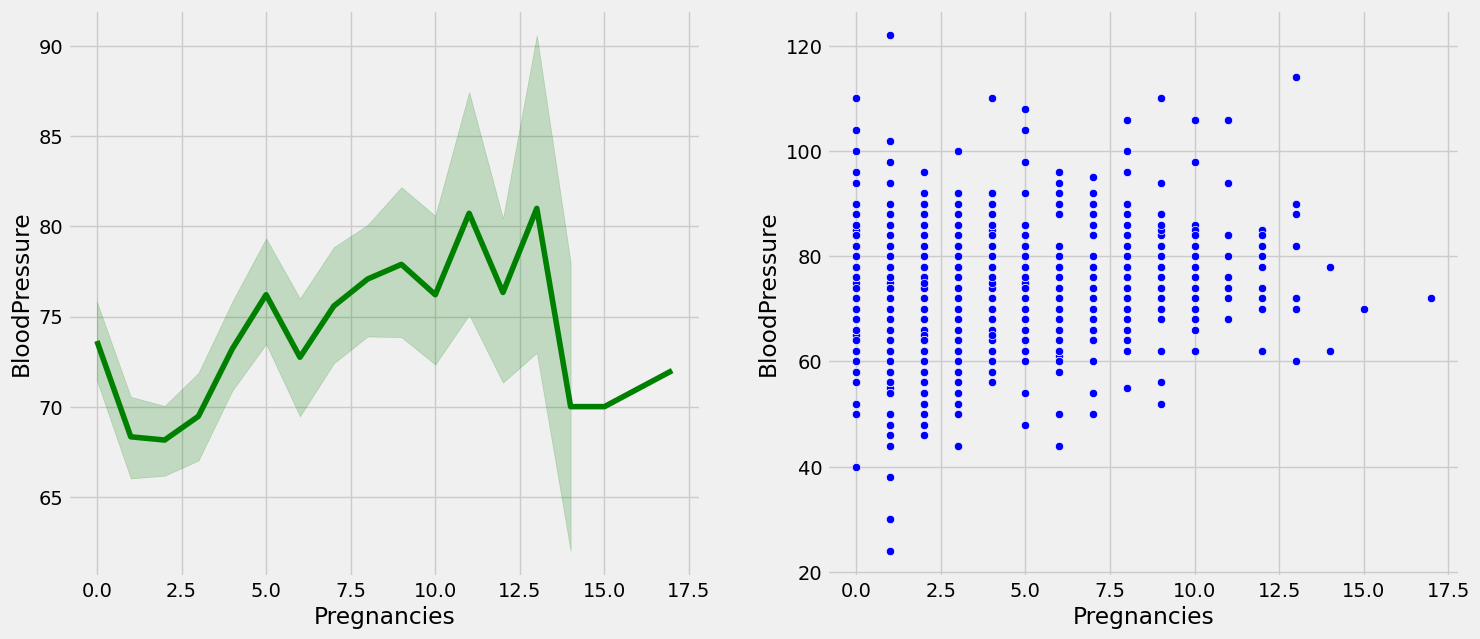

Bivariates between Pregnancies and SkinThickness


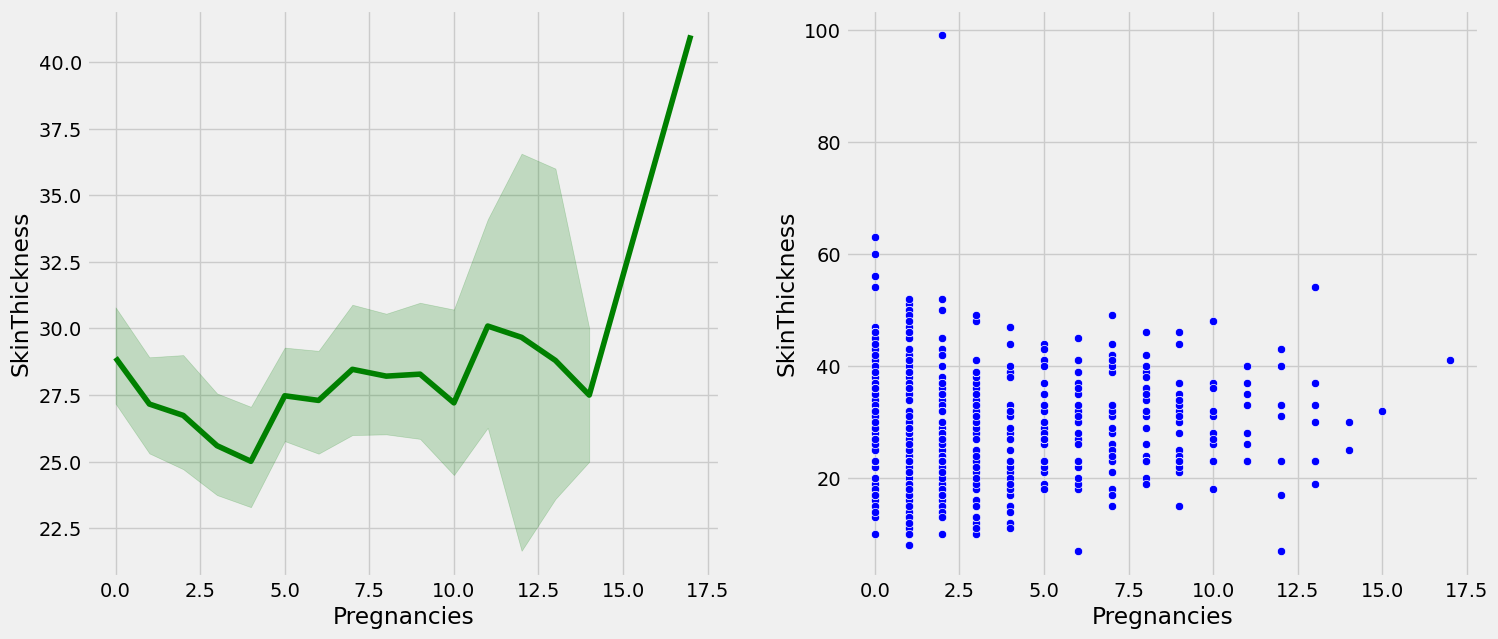

Bivariates between Pregnancies and Insulin


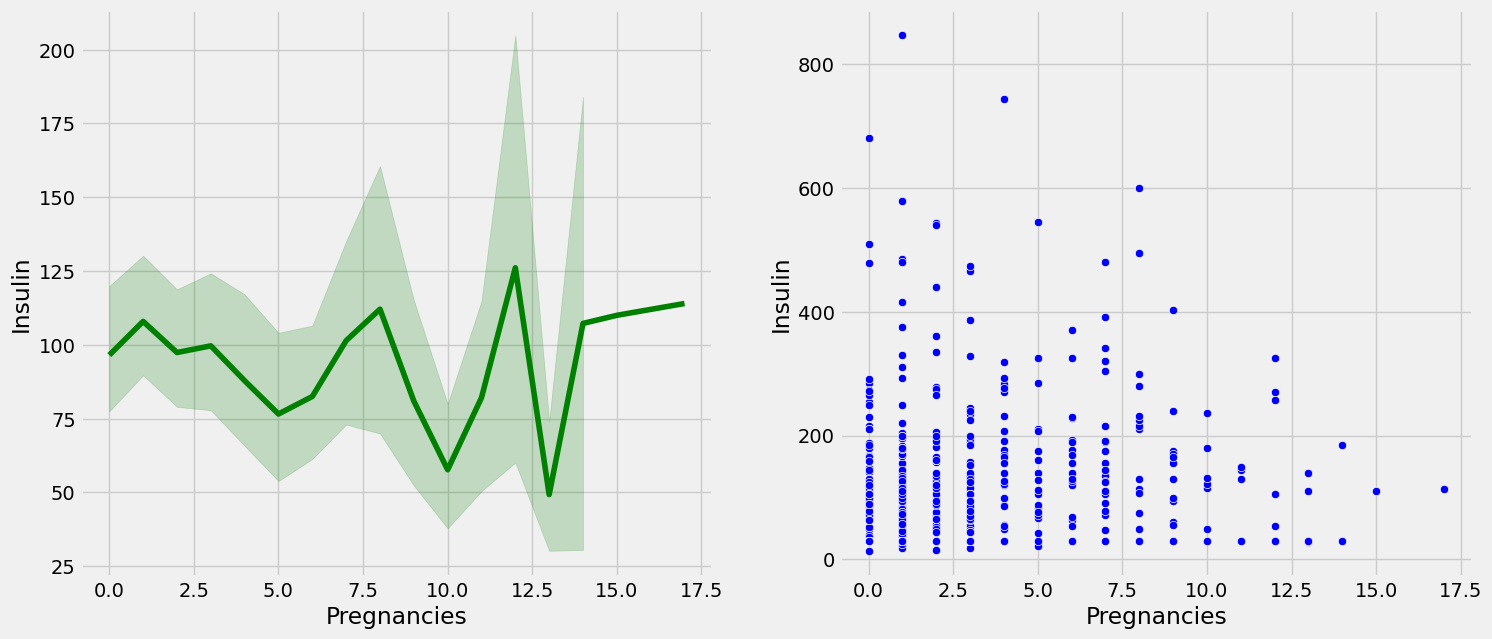

Bivariates between Pregnancies and BMI


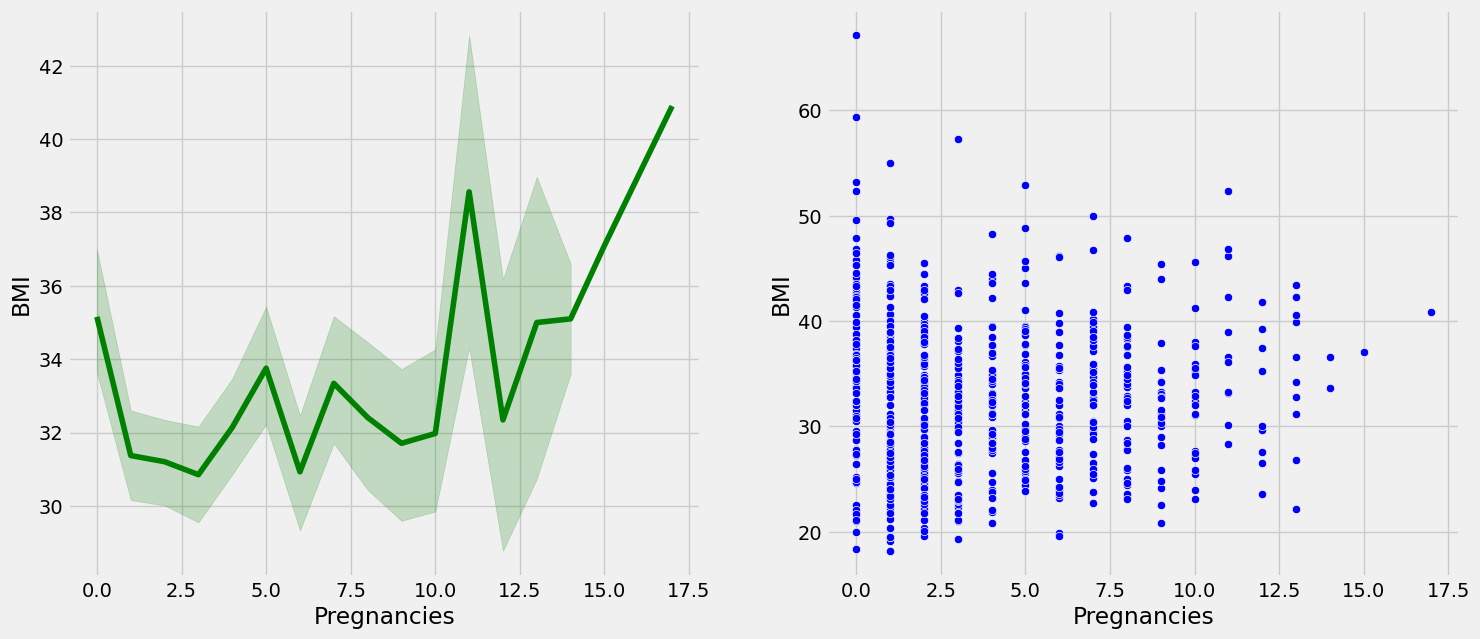

Bivariates between Pregnancies and DiabetesPedigreeFunction


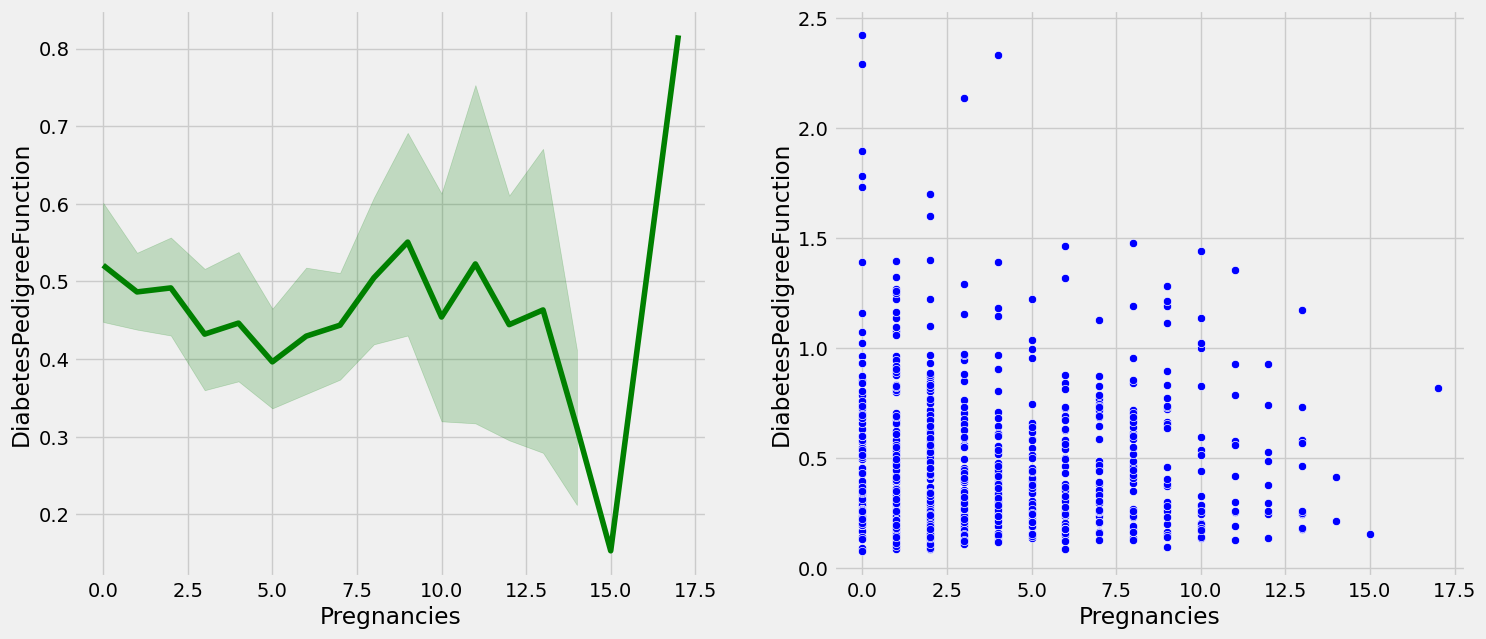

Bivariates between Pregnancies and Age


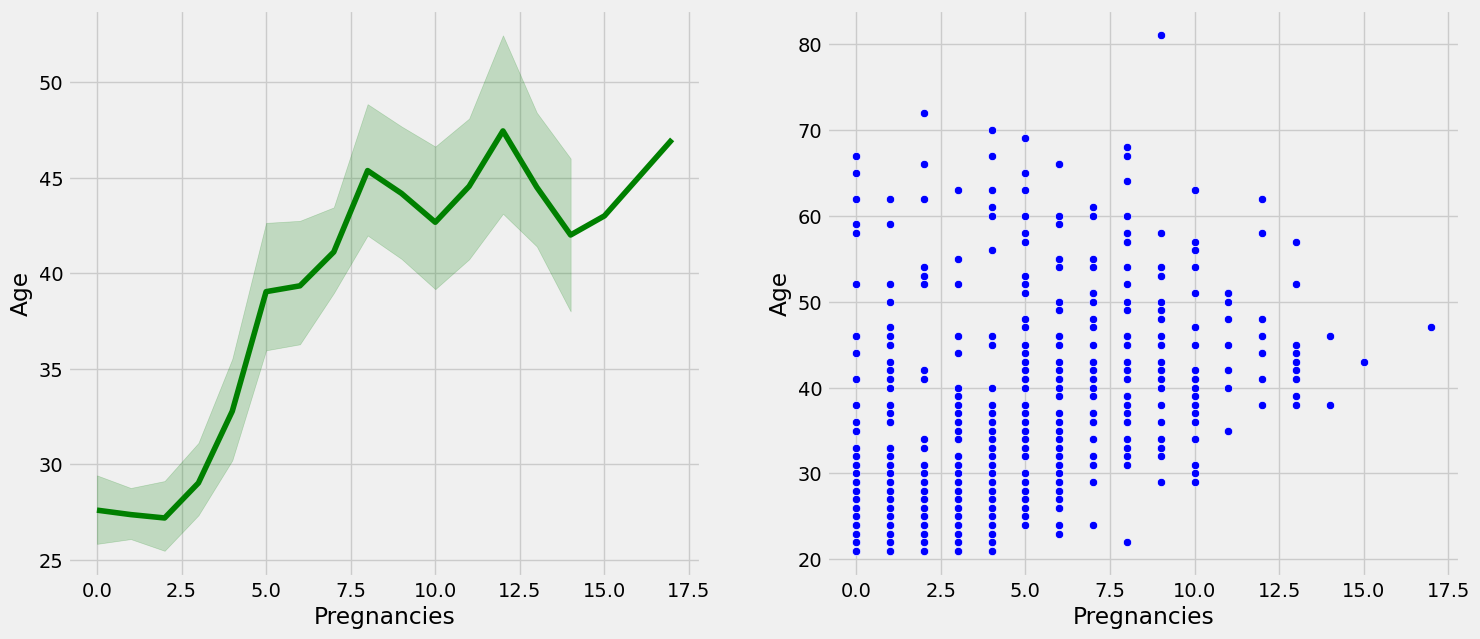

In [82]:
for col in data.select_dtypes(exclude='O').columns:
    lineplot_scatterplot(data=data, feature1='Pregnancies', feature2=col)
    
    

##### MULTIVARIATE CHARTS

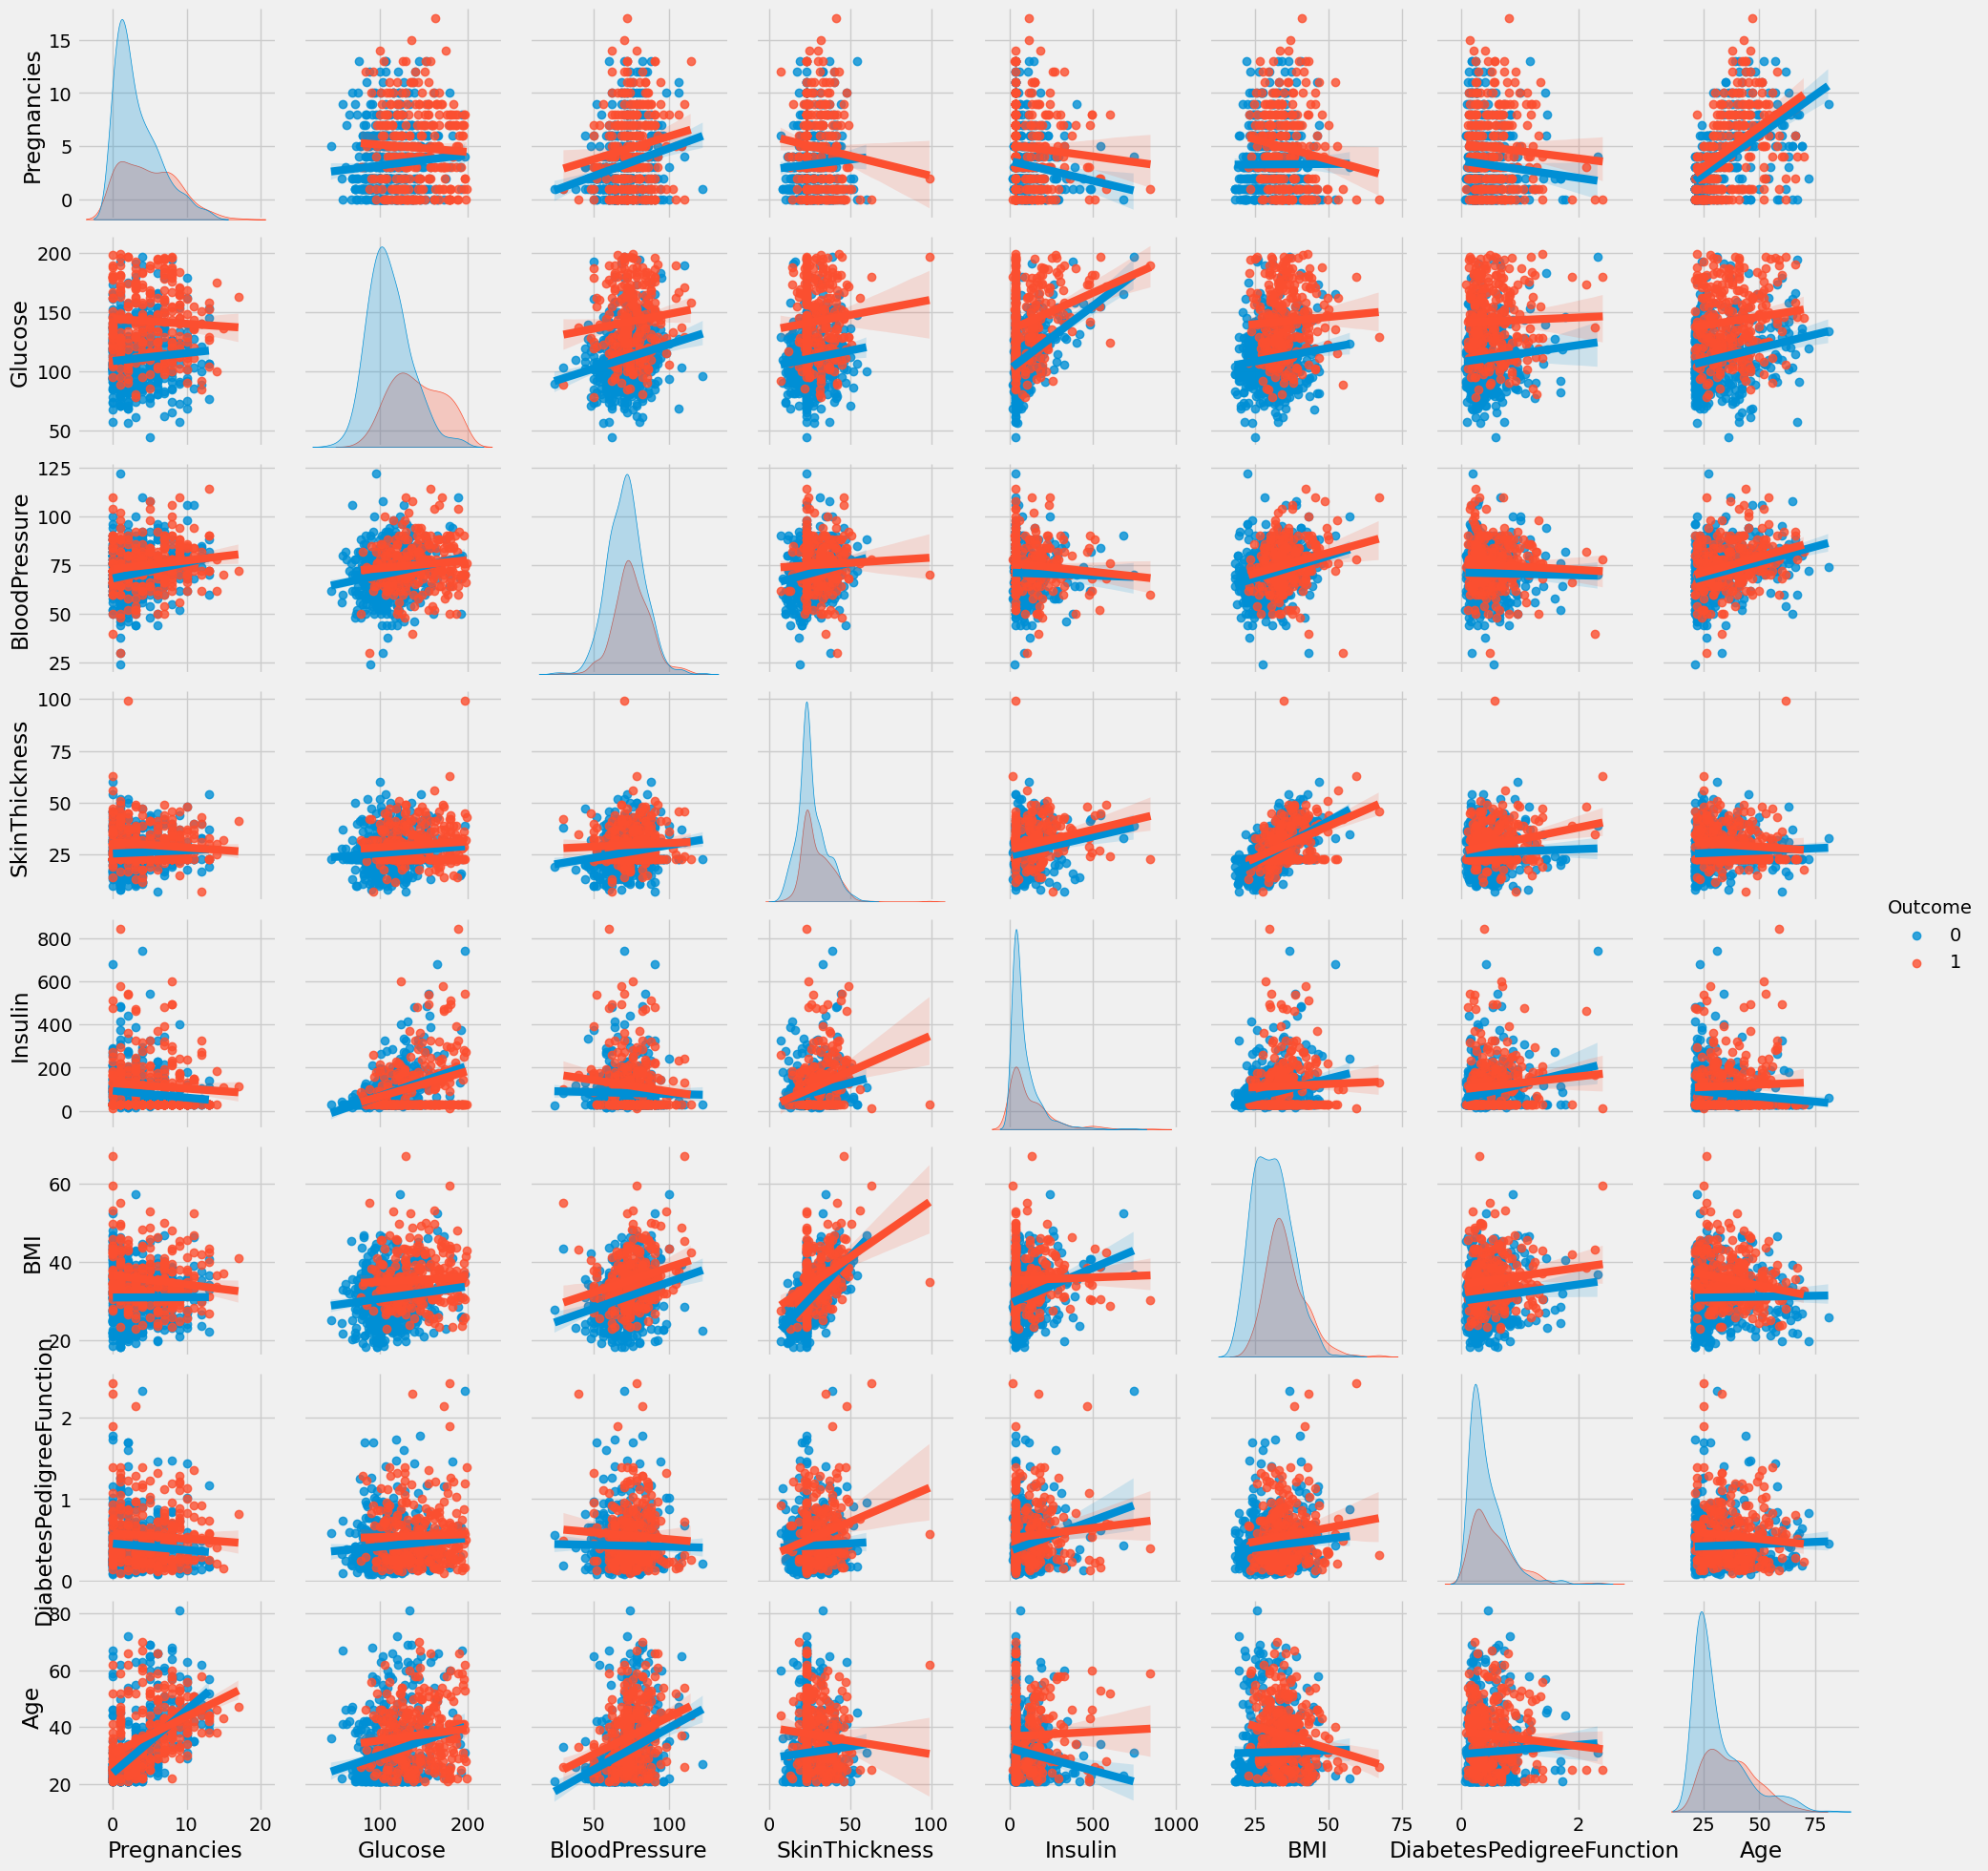

In [83]:
sns.pairplot(data=df, hue='Outcome', kind='reg')

##### Correlations and Heatmaps

In [84]:
df[df.columns[:]].corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.492782
BloodPressure               0.165723
SkinThickness               0.189065
Insulin                     0.148457
BMI                         0.312249
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

<AxesSubplot:>

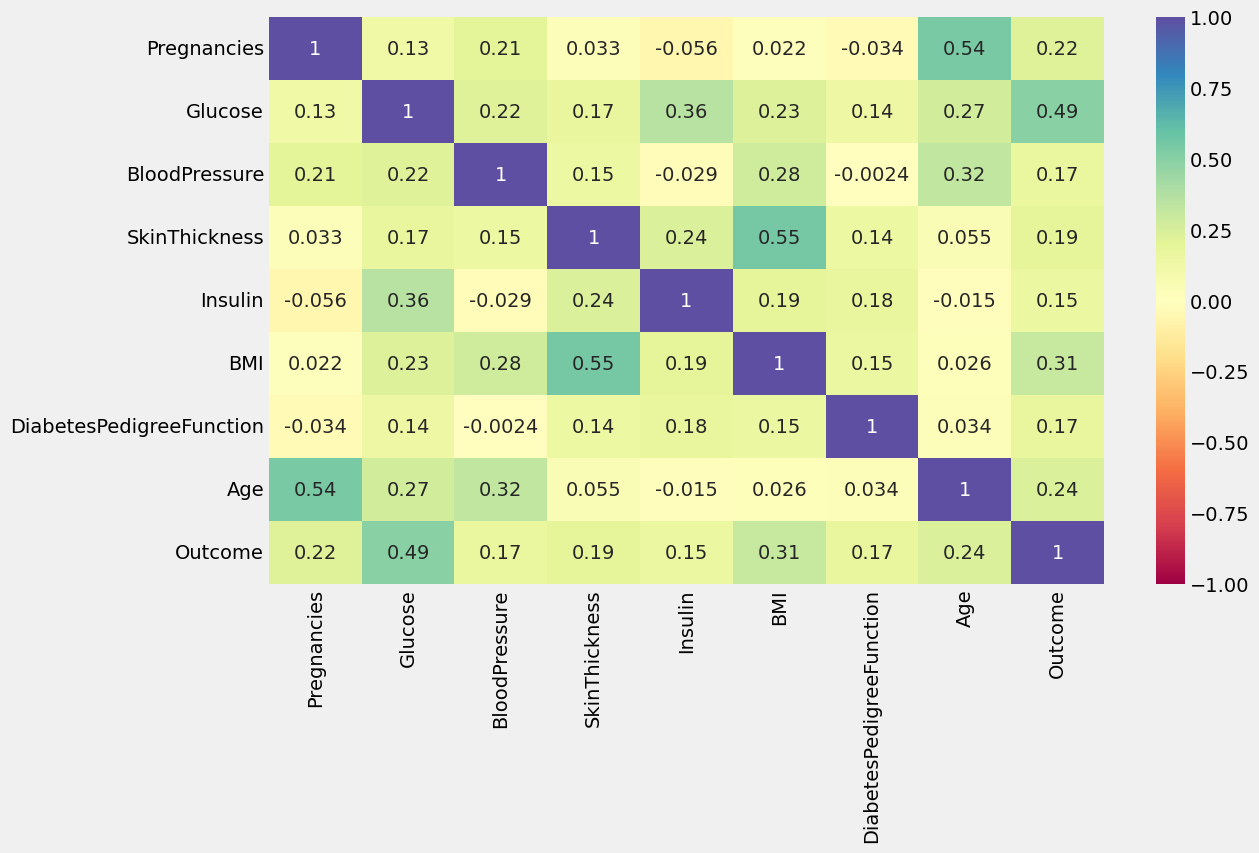

In [85]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmax=+1, vmin=-1)

**Observations**
Glucose and BMI seem to be strongest predictors of Diabetes

In [86]:
%%writefile eda.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import streamlit as st
st.set_option('deprecation.showPyplotGlobalUse', False)
st.title("The EDA Page")

def main():
    st.sidebar.subheader("Please choose the plot")
    data=pd.read_csv('data.csv')
    # drop the redundant column
    data=data.drop('Unnamed: 0', axis=1)
    # treat the nulls
    zerofiller=lambda x: x.replace(0, x.median())
    cols=data.columns[1:6]
    data[cols]=data[cols].apply(zerofiller, axis=0)
    #encode categoricals
    df=data.copy()
    d={'Yes':1, 'No':0}
    df['Outcome']=df['Outcome'].map(d)
    
    def histograms(data):
        st.subheader('Univariate Histogram')
        data.hist()
        plt.tight_layout()
        st.pyplot()
    def barchart(data, feature):
        st.subheader("Barchart of Categoricals")
        ax=sns.countplot(data=data, x=feature, color='green')
        for p in ax.patches:
            x=p.get_bbox().get_points()[:,0]
            y=p.get_bbox().get_points()[1,1]
            ax.annotate("{:.2g}%".format(100.*y/len(data)), (x.mean(),y), ha='center' , va='bottom')                                  
        st.pyplot()
        
    def heatmap(data):
        st.subheader("The Heatmap")
        plt.figure(figsize=(12,7))
        sns.heatmap(df.corr(), annot=True, cmap='Spectral', vmax=+1, vmin=-1)
        st.pyplot()
        
    plot=st.sidebar.selectbox('Choose Plot',('Histograms', 'Barchart', 'Heatmap'))
    if st.sidebar.button("PLOT"):
        if plot=='Histograms':
            histograms(df)
        if plot=='Barchart':
            barchart(data=df, feature='Outcome')
        if plot=='Heatmap':
            heatmap(data=df)
        
if __name__=='__main__':
    main()
        
        

    
    
    

Overwriting eda.py


### Step4. Preprocess the data for modelling
- seperate the features and label
- do categorical encoding
- impute nulls
- solve data imbalance 
- train test split
- feature scaling


In [103]:
def process(df, label):
    X=df.drop(label, axis=1)
    y=df.Outcome
    from imblearn.over_sampling import SMOTE
    sm=SMOTE()
    X, y=s.fit_resample(x,y)
    x_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)
    return  x_train, x_test, y_train, y_test

In [104]:
x_train, x_test, y_train, y_test=preprocess(df, 'Outcome')

In [105]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [106]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(700, 8) (700,) (300, 8) (300,)


### Step5. Fit and Evaluate various Models

In [107]:
# create a function for metrics
def print_metrics(y_test, y_pred, model):
    print("Metrics for model ", model)
    print('')
    print("The accuracy score is ", accuracy_score(y_test, y_pred))
    print('')
    print("The precision score is ", precision_score(y_test, y_pred))
    print('')
    print("The recall score is ", recall_score(y_test, y_pred))
    print('')
    print("The f1 score is ", f1_score(y_test, y_pred))
    print('')
    print("The roc score is ", roc_auc_score(y_test, y_pred))
    print("The confusion matrix")
    print(confusion_matrix(y_test, y_pred))
    print("The Classification Report")
    print(classification_report(y_test, y_pred))

In [108]:
def plot_metrics(clf, x_test, y_test, model_name):
    print("Metric Plots for ", model_name)
    plot_confusion_matrix(clf, x_test, y_test, display_labels=[0,1])
    print('')
    plot_roc_curve(clf, x_test, y_test)
    print('')
    plot_precision_recall_curve(clf, x_test, y_test)

In [109]:
# build and evaluate a knn model
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print_metrics(y_test, y_pred, 'KNN')

Metrics for model  KNN

The accuracy score is  0.76

The precision score is  0.7257142857142858

The recall score is  0.8410596026490066

The f1 score is  0.7791411042944786

The roc score is  0.7594559758211477
The confusion matrix
[[101  48]
 [ 24 127]]
The Classification Report
              precision    recall  f1-score   support

           0       0.81      0.68      0.74       149
           1       0.73      0.84      0.78       151

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



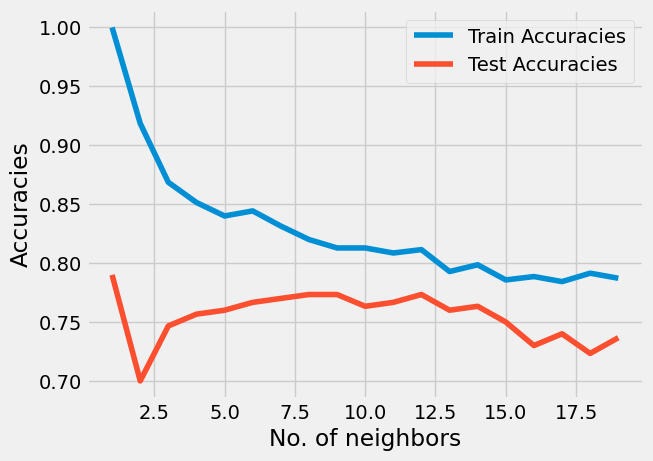

In [111]:
# lets optimize the KNN model
neighbors=np.arange(1,20)
train_accuracies=np.empty(len(neighbors))
test_accuracies=np.empty(len(neighbors))

# enumerate within neighbors
for i, k in enumerate(neighbors):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred=knn.predict(x_test)
    train_accuracies[i]=knn.score(x_train, y_train)
    test_accuracies[i]=knn.score(x_test, y_test)

# plot the model cpmplexity curves
plt.plot(neighbors, train_accuracies, label="Train Accuracies")
plt.plot(neighbors, test_accuracies, label="Test Accuracies")
plt.legend()
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracies')
plt.show()

    
    
    

In [112]:
# build and evaluate optimizedknn model
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train, y_train)
y_pred=knn.predict(x_test)
print_metrics(y_test, y_pred, 'KNN')

Metrics for model  KNN

The accuracy score is  0.7733333333333333

The precision score is  0.7455621301775148

The recall score is  0.8344370860927153

The f1 score is  0.7875000000000001

The roc score is  0.7729232410329347
The confusion matrix
[[106  43]
 [ 25 126]]
The Classification Report
              precision    recall  f1-score   support

           0       0.81      0.71      0.76       149
           1       0.75      0.83      0.79       151

    accuracy                           0.77       300
   macro avg       0.78      0.77      0.77       300
weighted avg       0.78      0.77      0.77       300



In [115]:
# lets fit all models in parallel 
clfs={
    'KNN':KNeighborsClassifier(),
    'Logreg':LogisticRegression(),
    'NaiveBayes':GaussianNB(),
    'DecisionTree': DecisionTreeClassifier(),
    "RandomForest":RandomForestClassifier(),
    "AdaBoost":AdaBoostClassifier(),
    "GradientBoosting":GradientBoostingClassifier(),
    "XGBoost":XGBClassifier(),
    "SVM": SVC()
}

models_report=pd.DataFrame(columns=['name', 'precision','f1_score'])

for clf, clf_name in list(zip(clfs.values(), clfs.keys())):
    clf.fit(x_train, y_train)
    print("fitting the model...", clf_name)
    y_pred=clf.predict(x_test)
    t={
        'name':clf_name,
        'precision':precision_score(y_test, y_pred),
        'f1_score':f1_score(y_test, y_pred)
    }
    models_report=models_report.append(t, ignore_index=True)

models_report=models_report.sort_values(by='f1_score', ascending=False)
models_report
    
    


fitting the model... KNN
fitting the model... Logreg
fitting the model... NaiveBayes
fitting the model... DecisionTree
fitting the model... RandomForest
fitting the model... AdaBoost
fitting the model... GradientBoosting
fitting the model... XGBoost
fitting the model... SVM


,name,precision,f1_score
4,RandomForest,0.779874,0.800000
7,XGBoost,0.754491,0.792453
0,KNN,0.725714,0.779141
6,GradientBoosting,0.750000,0.771704
5,AdaBoost,0.742138,0.761290
8,SVM,0.753247,0.760656
2,NaiveBayes,0.779412,0.738676
3,DecisionTree,0.741497,0.731544
1,Logreg,0.753623,0.719723


In [116]:
# lets optimize the random fiorest model
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred=rfc.predict(x_test)
print_metrics(y_test, y_pred, 'Random Forest')

Metrics for model  Random Forest

The accuracy score is  0.7566666666666667

The precision score is  0.7407407407407407

The recall score is  0.7947019867549668

The f1 score is  0.7667731629392972

The roc score is  0.7564113960620472
The confusion matrix
[[107  42]
 [ 31 120]]
The Classification Report
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       149
           1       0.74      0.79      0.77       151

    accuracy                           0.76       300
   macro avg       0.76      0.76      0.76       300
weighted avg       0.76      0.76      0.76       300



In [117]:
param_grid={
    'n_estimators':[100,200,300],
    'min_samples_leaf':range(1,5,1),
    'min_samples_split':range(2,10,2),
    'max_depth':[2,5,'auto'],
    'max_features':['sqrt','log2'],
    'criterion':['gini', 'entropy']
}

n_folds=5
cv=GridSearchCV(estimator=rfc, cv=n_folds, param_grid=param_grid, n_jobs=-1, verbose=3, return_train_score=False)
cv.fit(x_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 'auto'],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [118]:
cv.best_score_

0.8071428571428573

In [119]:
best_clf=cv.best_estimator_
best_clf.fit(x_train, y_train)
y_pred=best_clf.predict(x_test)
print_metrics(y_test, y_pred, 'Tuned RFC')

Metrics for model  Tuned RFC

The accuracy score is  0.7633333333333333

The precision score is  0.7380952380952381

The recall score is  0.8211920529801324

The f1 score is  0.7774294670846396

The roc score is  0.7629450197786568
The confusion matrix
[[105  44]
 [ 27 124]]
The Classification Report
              precision    recall  f1-score   support

           0       0.80      0.70      0.75       149
           1       0.74      0.82      0.78       151

    accuracy                           0.76       300
   macro avg       0.77      0.76      0.76       300
weighted avg       0.77      0.76      0.76       300



In [120]:
# create a pipeline
from sklearn.pipeline import Pipeline
sc=StandardScaler()
best_clf=best_clf
steps=[('sc', sc), ('best_clf', best_clf)]
pipeline=Pipeline(steps)
x_train, x_test, y_train, y_test=preprocess(df, label='Outcome')
pipeline.fit(x_train, y_train)
y_pred=pipeline.predict(x_test)
print_metrics(y_test, y_pred, 'Pipeline')

Metrics for model  Pipeline

The accuracy score is  0.7666666666666667

The precision score is  0.7314285714285714

The recall score is  0.847682119205298

The f1 score is  0.7852760736196319

The roc score is  0.7661229387972798
The confusion matrix
[[102  47]
 [ 23 128]]
The Classification Report
              precision    recall  f1-score   support

           0       0.82      0.68      0.74       149
           1       0.73      0.85      0.79       151

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.76       300
weighted avg       0.77      0.77      0.77       300



In [122]:
import pickle
model=open('rfc.pickle', 'wb')
pickle.dump(pipeline, model)
model.close()

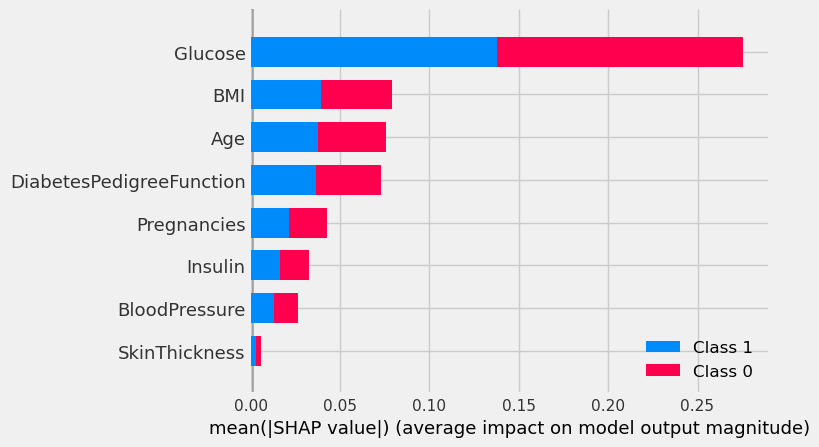

In [125]:
import shap
X=df.drop('Outcome', axis=1)
value=shap.TreeExplainer(best_clf).shap_values(x_test)
shap.summary_plot(value, x_train, plot_type='bar', feature_names=X.columns)

In [133]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle
st.title("Medical Diagnostics Web App")
st.subheader("Is the candidate diabetic?")

# Step1: Load the model
model=open('rfc.pickle', 'rb')
clf=pickle.load(model)
model.close()

# Step2 : Get the front end user inout
pregs=st.number_input('Pregnancies',0,20,0)
glucose=st.slider('Glucose',40.0, 200.0, 40.0)
bp=st.slider('BloodPressure',20.0, 140.0, 20.0)
skin=st.slider('SkinThickness',7.0, 99.0, 7.0)
insulin=st.slider('Insulin',14.0, 850.0, 14.0)
bmi=st.slider('BMI',18.0, 70.0, 18.0)
dpf=st.slider('DiabetesPedigreeFunction',0.05, 2.50, 0.05)
age=st.slider('Age', 20, 85, 20)

# Step3: Get the inout as model input
data={
    'Pregnancies':pregs, 
    'Glucose':glucose, 
    'BloodPressure':bp, 
    'SkinThickness':skin, 
    'Insulin':insulin,
    'BMI':bmi, 
    'DiabetesPedigreeFunction':dpf,
    'Age':age
}
input_data=pd.DataFrame([data])

# Step4 : Get the predictions and print result
preds=clf.predict(input_data)[0]
if st.button("Predict"):
    if preds==1:
        st.subheader("Diabetic")
    if preds==0:
        st.subheader("Non-diabetic")

Overwriting app.py
